In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [9]:
# load the dataset
df=pd.read_csv("USvideos.csv")

In [11]:
#displaying the first row,shape and info of the dataframe
print(df.head())
print(df.shape)
print(df.info())

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [14]:
#removing duplicate rows
df.drop_duplicates(inplace=True)
print(df.shape)

(40901, 16)


In [15]:
#drop columns that are not essential
unessential_columns=["thumbnail_link","description"]
df.drop(unessential_columns,axis=1,inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 40901 entries, 0 to 40948
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  comments_disabled       40901 non-null  bool  
 12  ratings_disabled        40901 non-null  bool  
 13  video_error_or_removed  40901 non-null  bool  
dtypes: bool(3), int64(5), object(6)
memory usage: 3.9+ MB
None


In [16]:
#display statistical summmary
print(df.describe())

        category_id         views         likes      dislikes  comment_count
count  40901.000000  4.090100e+04  4.090100e+04  4.090100e+04   4.090100e+04
mean      19.970588  2.360678e+06  7.427173e+04  3.711722e+03   8.448567e+03
std        7.569362  7.397719e+06  2.289999e+05  2.904624e+04   3.745139e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.419720e+05  5.416000e+03  2.020000e+02   6.130000e+02
50%       24.000000  6.810640e+05  1.806900e+04  6.300000e+02   1.855000e+03
75%       25.000000  1.821926e+06  5.533800e+04  1.936000e+03   5.752000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06


In [25]:
#convert 'trending_date' to datetime format
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [27]:
print("Displaying data after correcting the date format")
print(df.head(3))

Displaying data after correcting the date format
      video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...     Rudy Mancuso   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   

   dislikes  comment_count  comments_disabled  ratings_disa

In [28]:
#convert 'publish_time' to datetime format
df["publish_time"] = pd.to_datetime(df["publish_time"])
print(df.head(2))


      video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   

   category_id              publish_time  \
0           22 2017-11-13 17:13:01+00:00   
1           24 2017-11-13 07:30:00+00:00   

                                                tags    views  likes  \
0                                    SHANtell martin   748374  57527   
1  last week tonight trump presidency|"last week ...  2418783  97185   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0      2966          15954              False             False   
1      6146          12703              False             False   

   video_error_or_removed  
0                   False  
1                   False  


In [33]:
#adding new columns
df["publish_day"] = df["publish_time"].dt.day
df["publish_month"] = df["publish_time"].dt.month
df["publish_year"] = df["publish_time"].dt.year
df['publish_hour'] = df['publish_time'].dt.hour

In [37]:
#total videos published per year
yearly_counts = df.groupby("publish_year")['video_id'].count()

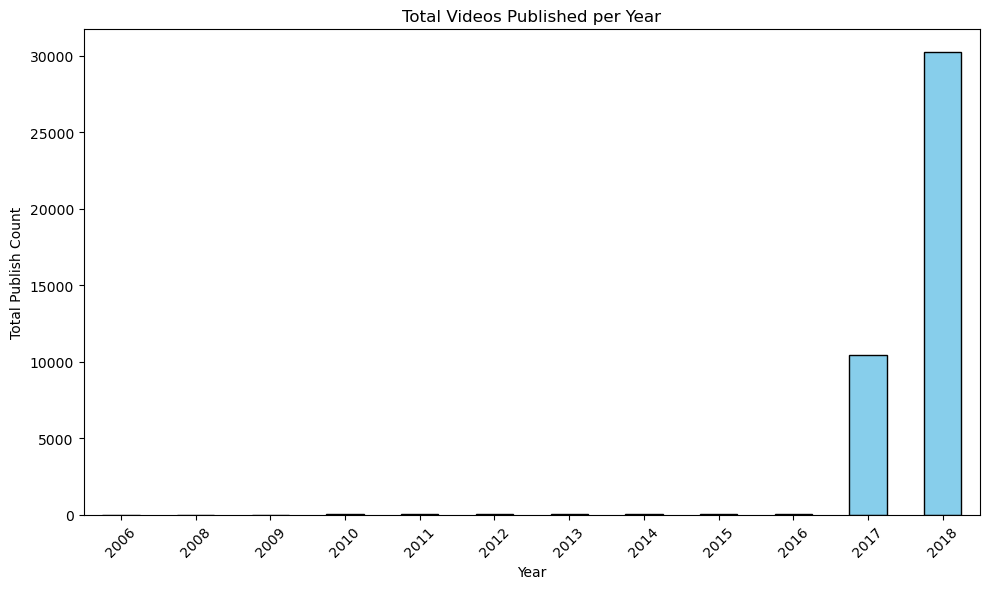

In [38]:
# Plotting total videos published per year
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Total Publish Count")
plt.title("Total Videos Published per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Total views per year
yearly_views = df.groupby("publish_year")['views'].sum()

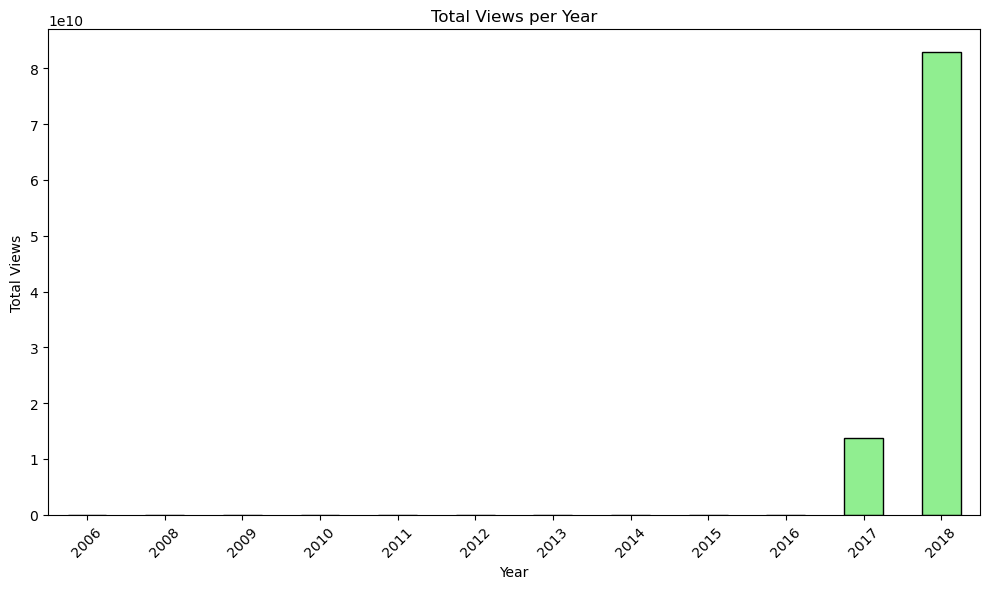

In [41]:
# Plotting total views per year
plt.figure(figsize=(10, 6))
yearly_views.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel("Year")
plt.ylabel("Total Views")
plt.title("Total Views per Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Print unique category ids
print(sorted(df["category_id"].unique()))

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]


In [44]:
# Mapping category ids to category names
category_mapping = {
    1: 'Film and Animation',
    2: 'Autos and Vehicles',
    10: 'Music',
    15: 'Pets and Animals',
    17: 'Sports',
    19: 'Travel and Events',
    20: 'Gaming',
    22: 'People and Blogs',
    23: 'Comedy',
    24: 'Entertainment',
    25: 'News and Politics',
    26: 'How to and Style',
    27: 'Education',
    28: 'Science and Technology',
    29: 'Non Profits and Activism',
    30: 'Movies',
    43: 'Shows'
}

In [45]:
# Add 'category_name' column to the dataframe
df['category_name'] = df['category_id'].map(category_mapping)

In [46]:
# Display the first few rows with the new 'category_name' column
print(df.head())

      video_id trending_date  \
0  2kyS6SvSYSE    2017-11-14   
1  1ZAPwfrtAFY    2017-11-14   
2  5qpjK5DgCt4    2017-11-14   
3  puqaWrEC7tY    2017-11-14   
4  d380meD0W0M    2017-11-14   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22 2017-11-13 17:13:01+00:00   
1           24 2017-11-13 07:30:00+00:00   
2           23 2017-11-12 19:05:24+00:00   
3           24 2017-11-13 11:00:04+00:00   
4           24 2017-11-12 18:01:41+00:00   

                                                tags    views   lik

In [47]:
# Group by 'category_name' and sum the 'views'
categories_views = df.groupby("category_name")['views'].sum().reset_index()

In [48]:
# Sort and select the top 5 categories by total views
top_categories = categories_views.sort_values(by='views', ascending=False).head(5)

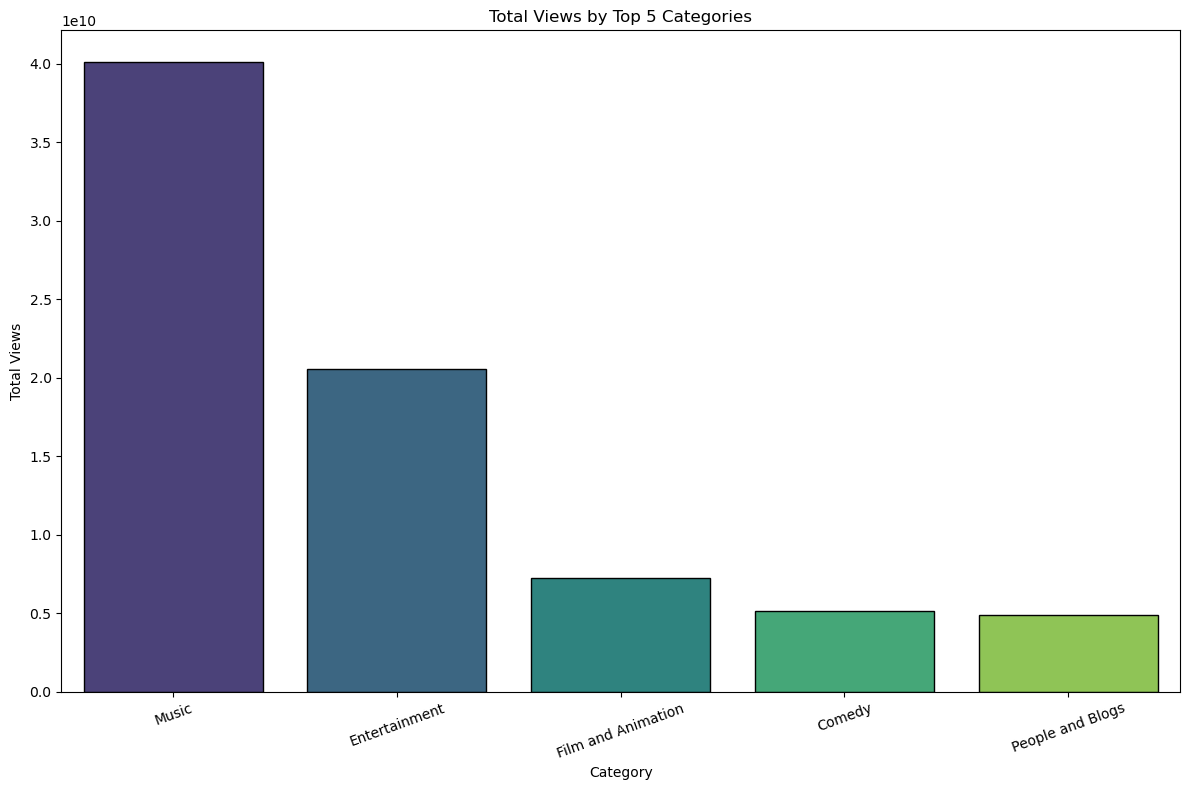

In [49]:
# Plotting the top 5 categories by total views
plt.figure(figsize=(12, 8))
sns.barplot(x='category_name', y='views', hue='category_name', data=top_categories, palette='viridis', dodge=False, edgecolor='black')
plt.xlabel("Category")
plt.ylabel("Total Views")
plt.title("Total Views by Top 5 Categories")
plt.legend([],[], frameon=False)  # Hide the legend
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


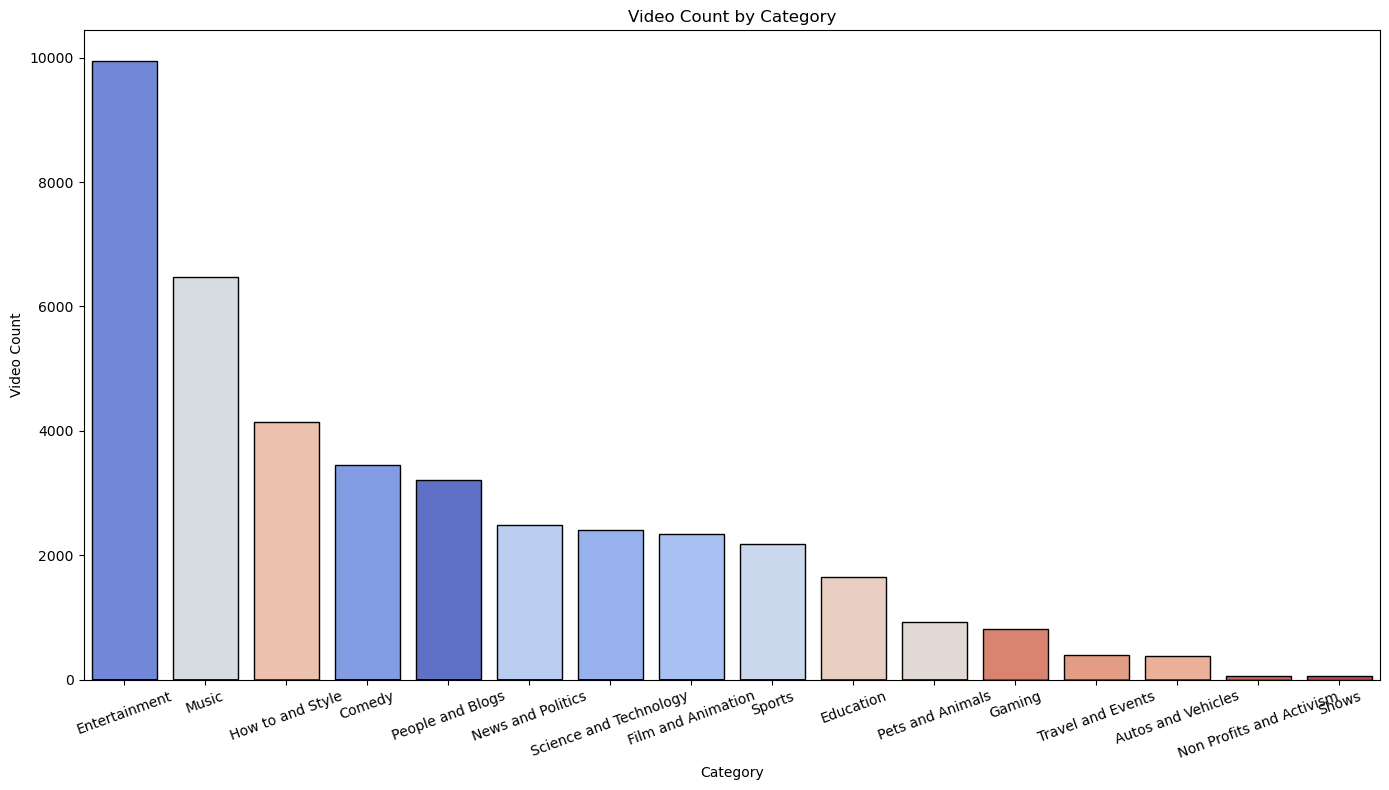

In [50]:
# Plotting video count per category
plt.figure(figsize=(14, 8))
sns.countplot(x="category_name", hue='category_name', data=df, order=df['category_name'].value_counts().index, palette='coolwarm', dodge=False, edgecolor='black')
plt.xlabel("Category")
plt.ylabel("Video Count")
plt.title("Video Count by Category")
plt.legend([],[], frameon=False)  # Hide the legend
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [51]:
# Number of Videos Published per Hour
videos_per_hour = df['publish_hour'].value_counts().sort_index()

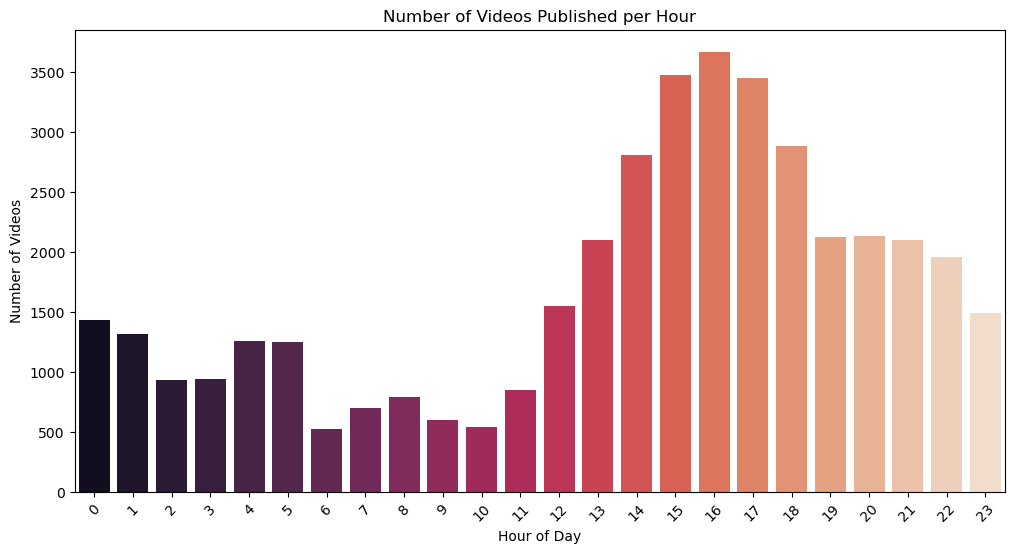

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(x=videos_per_hour.index, y=videos_per_hour.values, palette='rocket')
plt.title('Number of Videos Published per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


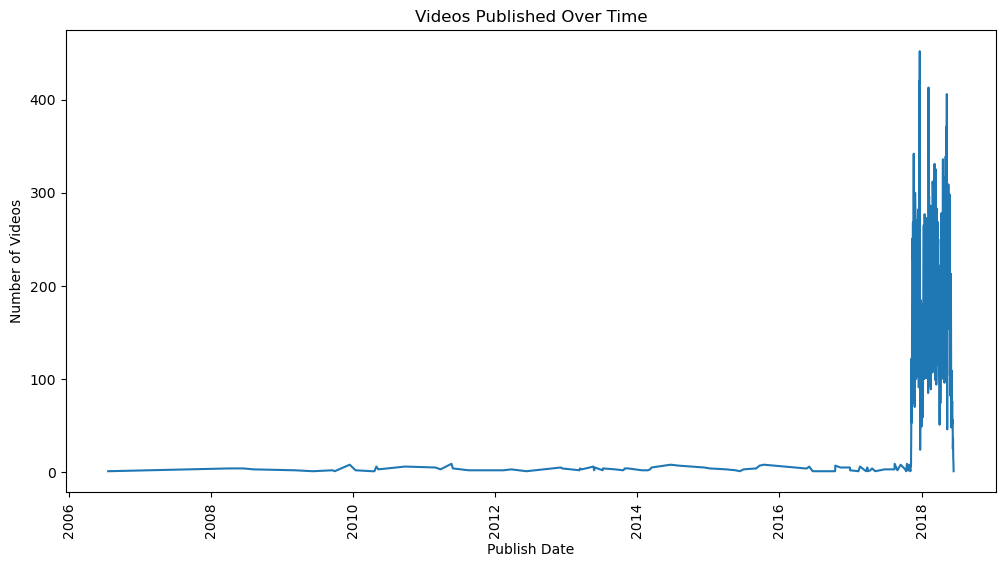

In [71]:
# Creating a line plot for Videos Published Over Time
df['publish_date'] = df['publish_time'].dt.date
video_count_by_date = df.groupby('publish_date').size()
plt.figure(figsize=(12, 6))
sns.lineplot(data=video_count_by_date)
plt.title("Videos Published Over Time")
plt.xlabel('Publish Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=90)
plt.show()


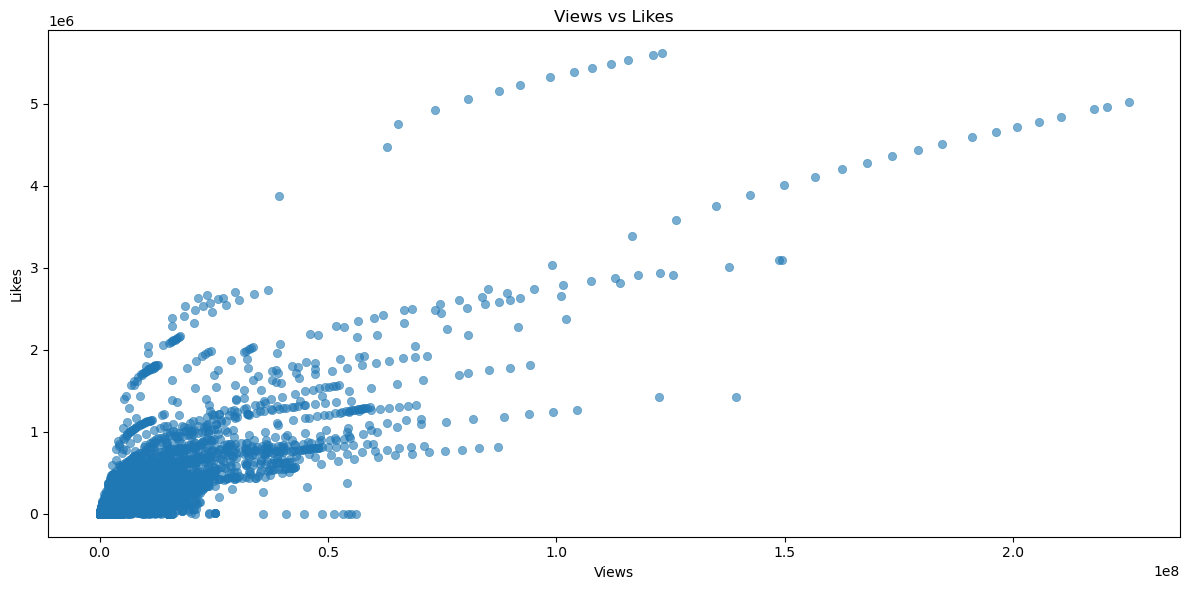

In [57]:
# Scatter plot between views and likes
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='views', y='likes', alpha=0.6, edgecolor=None)
plt.title('Views vs Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.tight_layout()
plt.show()


In [58]:
# Creating multiple subplots for different counts
plt.figure(figsize=(14, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.9)


<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, 'Comments Disabled')

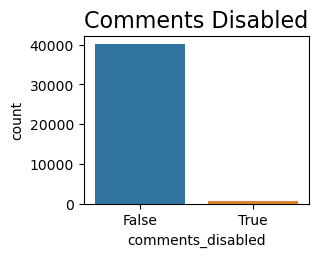

In [61]:
plt.subplot(2, 2, 1)
g = sns.countplot(x='comments_disabled', data=df)
g.set_title("Comments Disabled", fontsize=16)

Text(0.5, 1.0, 'Rating Disabled')

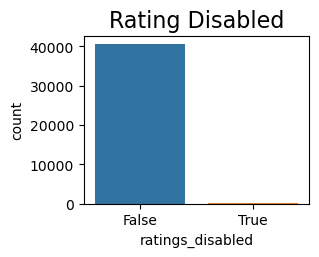

In [62]:
plt.subplot(2, 2, 2)
g1 = sns.countplot(x='ratings_disabled', data=df)
g1.set_title("Rating Disabled", fontsize=16)


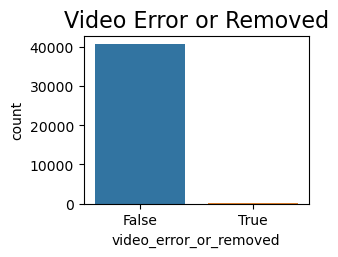

In [67]:
plt.subplot(2, 2, 3)
g2 = sns.countplot(x='video_error_or_removed', data=df)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

In [68]:
# Finding the correlation
corr_matrix = df['views'].corr(df['likes'])
print("Correlation between views and likes:", corr_matrix)

Correlation between views and likes: 0.8491785476230506
